# Exploratory Data Analysis

### Data importation & claeaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

In [13]:
os.chdir('c:/Projects/Delis Project/Data')
print(os.getcwd())

c:\Projects\Delis Project\Data


In [61]:
# Load and prepare data
data = pd.read_csv('stock_dataset1.csv', parse_dates=['Jour'])
data.rename(columns={'Jour': 'Date', 'Consommation': 'Consumption', 
                  'Reapprovisionnement': 'Replenishment'}, inplace=True)

### see what our dataset looks like

In [62]:
data.head()

,Date,Product_ID,Stock,Consumption,Replenishment
0,2025-01-01,P001,86,13,9
1,2025-01-01,P002,80,46,0
2,2025-01-01,P003,99,24,0
3,2025-01-01,P004,138,22,23
4,2025-01-01,P005,245,2,91


### Basic data exportation

In [63]:
print("Data Overview:")
print(f"Time Range: {data['Date'].min().date()} to {data['Date'].max().date()}")
print(f"Unique Products: {data['Product_ID'].nunique()}")
print(f"Total Records: {len(data)}")
print("\nMissing Values:")
print(data.isnull().sum())

Data Overview:
Time Range: 2025-01-01 to 2025-06-29
Unique Products: 50
Total Records: 9000

Missing Values:
Date             0
Product_ID       0
Stock            0
Consumption      0
Replenishment    0
dtype: int64


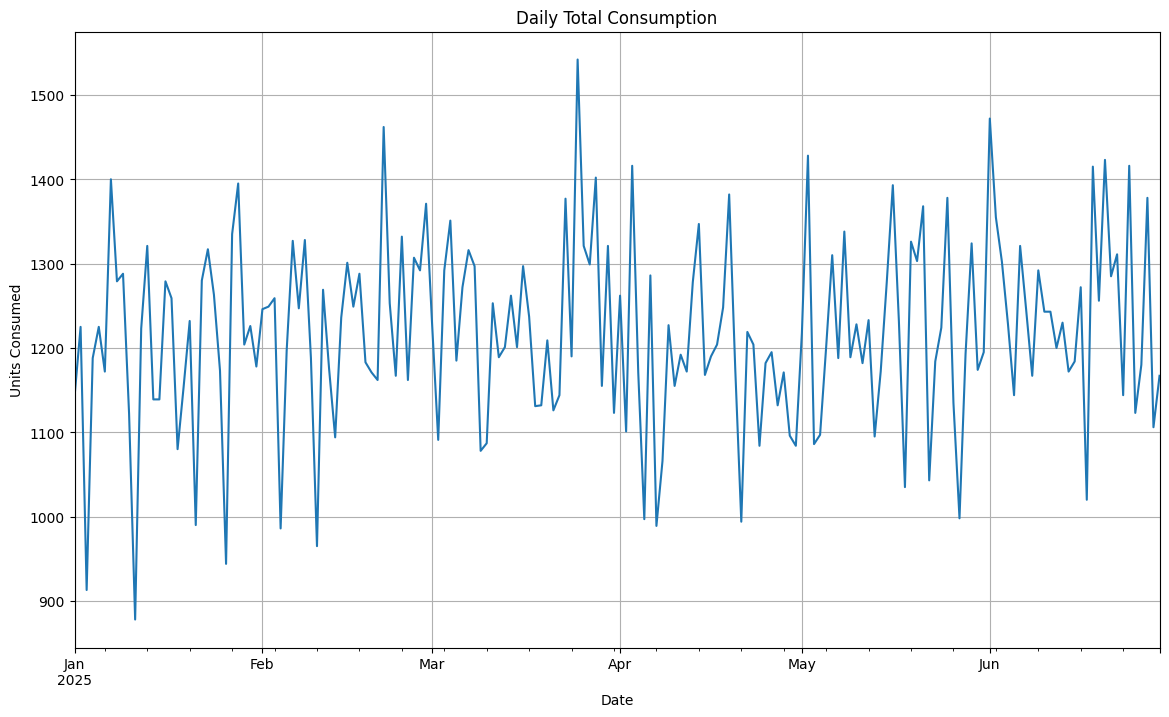

In [64]:
plt.figure(figsize=(14, 8))
data.groupby('Date')['Consumption'].sum().plot(title='Daily Total Consumption')
plt.ylabel('Units Consumed')
plt.grid(True)
plt.show()

### stock distrubtion analysis

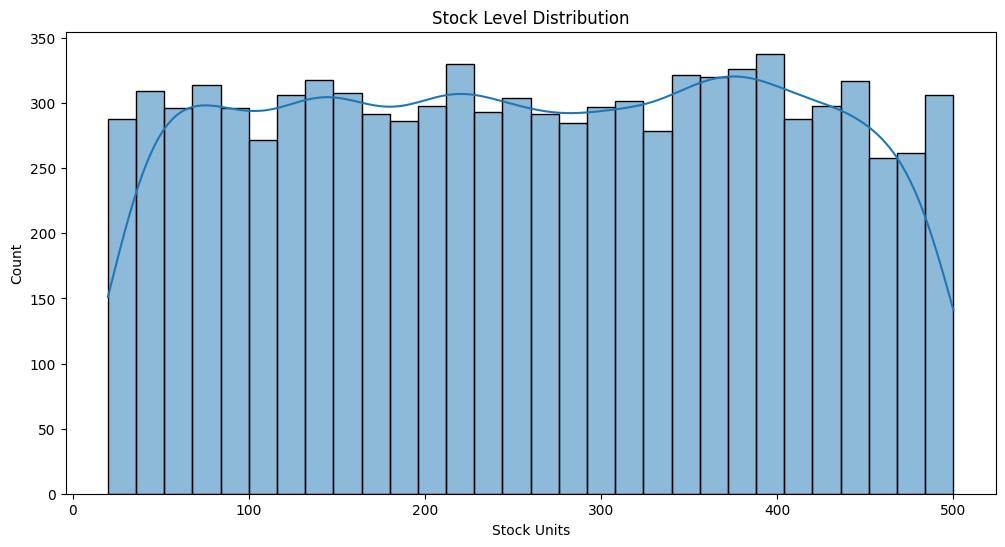

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Stock'], bins=30, kde=True)
plt.title('Stock Level Distribution')
plt.xlabel('Stock Units')
plt.show()

### Consommation vs Rapprovisionnement

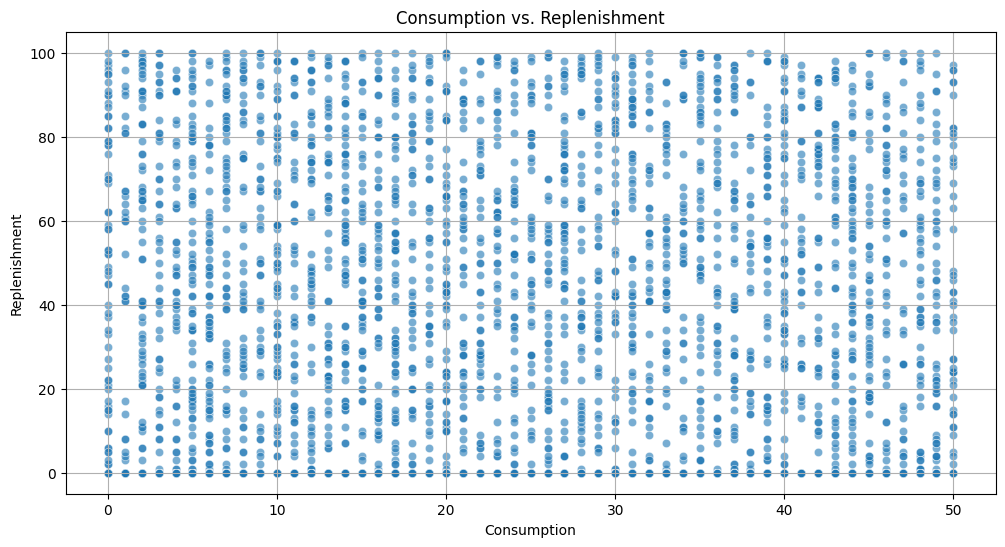

In [66]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Consumption', y='Replenishment', data = data, alpha=0.6)
plt.title('Consumption vs. Replenishment')
plt.grid(True)
plt.show()

### stock out risk analysis

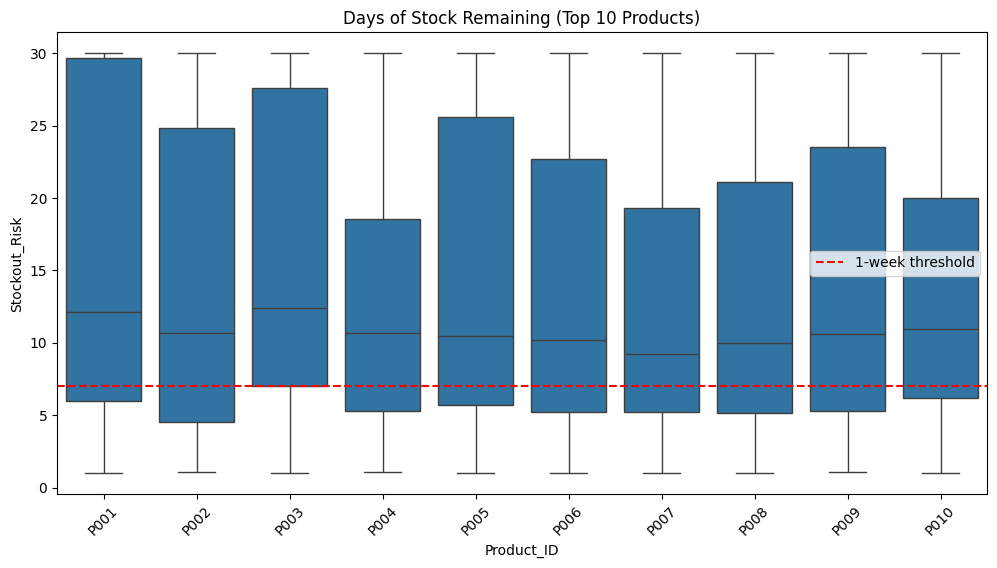

In [67]:
data['Stockout_Risk'] = data['Stock'] / data['Consumption'].replace(0, 0.1)  # Handle zero consumption
data['Stockout_Risk'] = data['Stockout_Risk'].clip(upper=30)  # Cap extreme values

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_ID', y='Stockout_Risk', 
            data=data[data['Product_ID'].isin(data['Product_ID'].value_counts().index[:10])])
plt.title('Days of Stock Remaining (Top 10 Products)')
plt.xticks(rotation=45)
plt.axhline(y=7, color='r', linestyle='--', label='1-week threshold')
plt.legend()
plt.show()

### Replenishment Patterns

In [70]:
replenishment_events = data[data['Replenishment'] > 0]
print("\nReplenishment Insights:")
print(f"Total replenishment events: {len(replenishment_events)}")
print(f"Average replenishment quantity: {replenishment_events['Replenishment'].mean():.1f} units")


Replenishment Insights:
Total replenishment events: 2650
Average replenishment quantity: 50.8 units


### Top products Analysis

In [68]:
top_products = data.groupby('Product_ID').agg(
    Avg_Stock=('Stock', 'mean'),
    Total_Consumption=('Consumption', 'sum'),
    Stockout_Events=('Stock', lambda x: (x < 10).sum())
).sort_values('Total_Consumption', ascending=False).head(10)

print("\nTop 10 Products by Consumption:")
print(top_products)


Top 10 Products by Consumption:
             Avg_Stock  Total_Consumption  Stockout_Events
Product_ID                                                
P035        243.894444               4821                0
P020        258.638889               4801                0
P036        259.188889               4695                0
P041        256.766667               4683                0
P015        280.972222               4614                0
P019        248.977778               4609                0
P006        263.394444               4587                0
P018        255.733333               4585                0
P025        259.150000               4585                0
P017        276.583333               4579                0
